<a href="https://colab.research.google.com/github/Shyam657/Bird_Species_Prediction/blob/main/Bird_image_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import keras


from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout , GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.callbacks import Callback, EarlyStopping,ModelCheckpoint

In [12]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.69G/1.69G [00:49<00:00, 40.0MB/s]
100% 1.69G/1.69G [00:49<00:00, 37.0MB/s]


In [16]:
import zipfile
zip_ref = zipfile.ZipFile('100-bird-species.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [17]:
#os.listdir('/kaggle/input/100-bird-species')

In [18]:
os.listdir('/content/files')

['train',
 'test',
 'BIRDS-450-(200 X 200)-99.28.h5',
 'valid',
 'info.txt',
 'birds.csv',
 'images to test']

In [19]:
#/content/100-bird-species/train


data_dir = pathlib.Path("/content/files/train")
BirdClasses = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(BirdClasses)

['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'ALBATROSS'
 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN FLAMINGO' 'AMERICAN GOLDFINCH'
 'AMERICAN KESTREL' 'AMERICAN PIPIT' 'AMERICAN REDSTART' 'AMERICAN WIGEON'
 'AMETHYST WOODSTAR' 'ANDEAN GOOSE' 'ANDEAN LAPWING' 'ANDEAN SISKIN'
 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD' 'ANTBIRD' 'ANTILLEAN EUPHONIA'
 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN' 'ASHY STORM PETREL'
 'ASHY THRUSHBIRD' 'ASIAN CRESTED IBIS' 'ASIAN DOLLARD BIRD'
 'AUCKLAND SHAQ' 'AUSTRAL CANASTERO' 'AUSTRALASIAN FIGBIRD' 'AVADAVAT'
 'AZARAS SPINETAIL' 'AZURE BREASTED PITTA' 'AZURE JAY' 'AZURE TANAGER'
 'AZURE TIT' 'BAIKAL TEAL' 'BALD EAGLE' 'BALD IBIS' 'BALI STARLING'
 'BALTIMORE ORIOLE' 'BANANAQUIT' 'BAND TAILED GUAN' 'BANDED BROADBILL'
 'BAN

In [20]:
'''
train = '/kaggle/input/100-bird-species/train'
validation = '/kaggle/input/100-bird-species/valid'
test = '/kaggle/input/100-bird-species/test'
'''

"\ntrain = '/kaggle/input/100-bird-species/train'\nvalidation = '/kaggle/input/100-bird-species/valid'\ntest = '/kaggle/input/100-bird-species/test'\n"

In [21]:
#/content/files/train


train = '/content/files/train'
validation = '/content/files/valid'
test = '/content/files/test'

In [22]:
def view_random_image(target_dir, target_class):
  
  # setting up the image directory
  target_folder = target_dir +"/"+ target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = plt.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  #print(f"Image shape: {img.shape}")
  
  return img

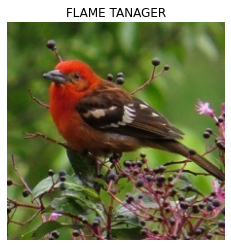

In [23]:
img = view_random_image(train,'FLAME TANAGER')

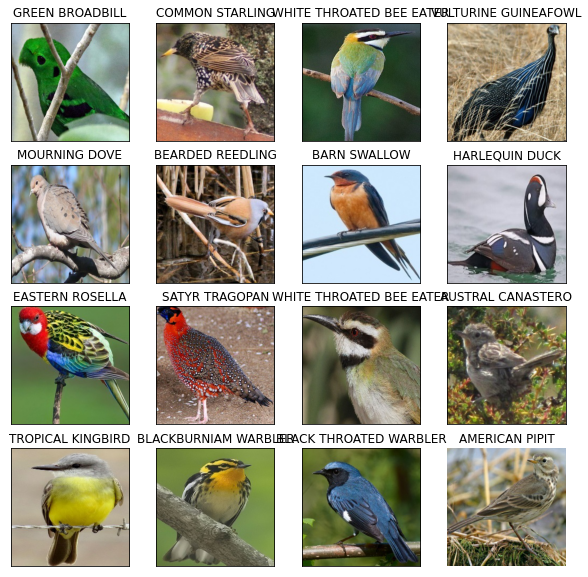

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

random_index = np.random.randint(0 , len(BirdClasses)-1 , 16)

for i, ax in enumerate(axes.flat):
    ax.imshow(view_random_image(train, BirdClasses[random_index[i]]))
    ax.set_title(BirdClasses[random_index[i]])

In [25]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory( train , target_size=(224,224) , batch_size=32 , class_mode = "categorical" ,shuffle=True )

val_data = val_gen.flow_from_directory( validation , target_size=(224,224) , batch_size=32 , class_mode = "categorical" , shuffle=True )

test_data = test_gen.flow_from_directory( test , target_size=(224,224) , batch_size=32 , class_mode = "categorical" ,shuffle=False )

Found 70626 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.


In [26]:
#Load Model
MobileNettV2 = tf.keras.applications.MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))


9406464/9406464 [==============================] - 0s 0us/step


In [27]:
MobileNettV2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [28]:
MobileNettV2.trainable=True

for layer in MobileNettV2.layers[:-20]:
  layer.trainable=False

In [29]:
n_categories = len(os.listdir('/content/files/train'))# number of categories
print(n_categories)

450


In [30]:
Model = Sequential([
    MobileNettV2,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dense(450,activation='softmax')
])

Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

In [31]:
Model.compile( optimizer="adam", loss="categorical_crossentropy" , metrics=["accuracy"] )

In [32]:
callbacks = [EarlyStopping(monitor='val_accuracy' , patience=5 , restore_best_weights=True)]

In [33]:
history = Model.fit(train_data,epochs=3 , batch_size=32 ,steps_per_epoch = len(train_data)
,callbacks=callbacks ,workers=10,use_multiprocessing=True, validation_data=val_data,validation_steps = len(val_data))

Epoch 1/3
2208/2208 [==============================] - 309s 134ms/step - loss: 1.3536 - accuracy: 0.6937 - val_loss: 0.8902 - val_accuracy: 0.7520
Epoch 2/3
2208/2208 [==============================] - 293s 132ms/step - loss: 0.5356 - accuracy: 0.8526 - val_loss: 0.4130 - val_accuracy: 0.8840
Epoch 3/3
2208/2208 [==============================] - 295s 133ms/step - loss: 0.3994 - accuracy: 0.8865 - val_loss: 0.3621 - val_accuracy: 0.8991


In [34]:
results = Model.evaluate(test_data, verbose=0)


print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.29316
Test Accuracy: 91.29%


In [35]:
def plot_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()
  plt.show()
  plt.tight_layout()

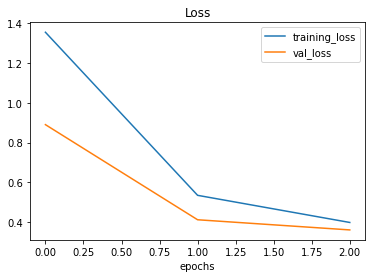

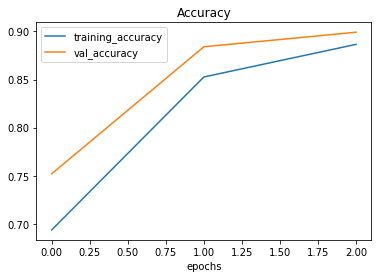

<Figure size 432x288 with 0 Axes>

In [36]:
plot_curves(history)

In [37]:
pred = Model.predict(test_data)
pred = np.argmax(pred,axis=1)

71/71 [==============================] - 6s 75ms/step


True Label: AMERICAN AVOCET
Predicted Label: AMERICAN AVOCET


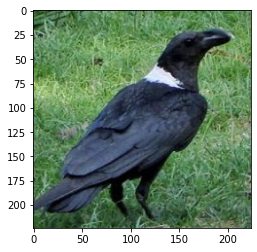

In [38]:
index =69

img , label = test_data[index]
label = test_data.labels[index]
print(f"True Label: {BirdClasses[label]}")
print(f"Predicted Label: {BirdClasses[pred[index]]}")  
plt.imshow(img[0])
plt.show()

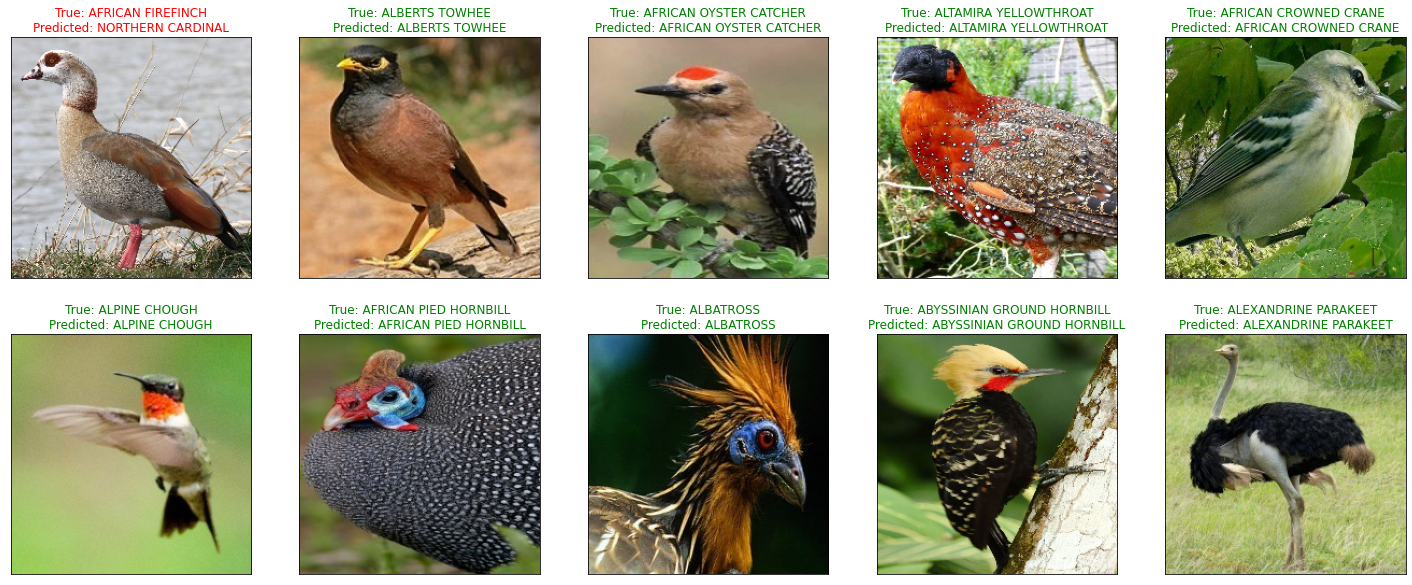

<Figure size 432x288 with 0 Axes>

In [39]:
# Display 10 random pictures from the dataset with their labels

random_index = np.random.randint(0, len(test_data) - 1, 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    randImg , randLabel = test_data[random_index[i]]
    randLabel = test_data.labels[random_index[i]]
    ax.imshow(randImg[0])
    if BirdClasses[randLabel] == BirdClasses[pred[random_index[i]]]:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {BirdClasses[randLabel]}\nPredicted: {BirdClasses[pred[random_index[i]]]}", color=color)
plt.show()
plt.tight_layout()

In [40]:
def load_and_prep_image(filename, img_shape = 224):
  img = tf.io.read_file(filename) #read image
  img = tf.image.decode_image(img) # decode the image to a tensor
  img = tf.image.resize(img, size = [img_shape, img_shape]) # resize the image
  img = img/255. # rescale the image
  return img

In [41]:
def pred_and_plot(filename, class_names):

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = Model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[pred.argmax()]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 1s 1s/step


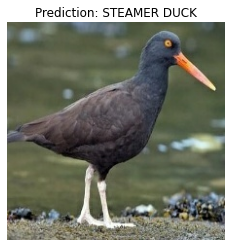

In [42]:
pred_and_plot("/content/files/train/AFRICAN OYSTER CATCHER/012.jpg", BirdClasses)

In [43]:

Model.save("BirdSpecies.h5")